# Exercise 7: Performance evaluation, Bayes, and Naive Bayes

The objective of today’s exercise is to estimate confidence intervals for the performance of both regression and classification models, to compare two regression and two classification models against each other, and finally to introduce the Na ̈ıve Bayes classification method.

### Exercise 7.1: Statistical Evaluation of Classifiers

In this exercise, we will focus on the **performance evaluation** of different classifiers using statistical methods. The key goals are:
- To use **cross-validation** techniques (such as leave-one-out cross-validation) to evaluate and compare the accuracy of different classification models.
- To understand how the choice of model parameters (e.g., number of neighbors \( k \) in KNN) affects performance, and to assess which model performs best based on empirical evidence.

Through this exercise, we aim to gain insights into how different classifiers handle the same dataset and how their predictive accuracy varies based on the chosen model parameters.

### Exercise 7.1.1: Evaluating the Performance of Different KNN Models

In this task, we will evaluate the performance of three K-nearest neighbor (KNN) models on the Iris dataset using **leave-one-out cross-validation (LOO-CV)**. The models use different values of \( k \):
- \( k = 1 \)
- \( k = 20 \)
- \( k = 80 \)

For each model, the classification accuracy will be computed, and we will compare the performance of the models to draw conclusions about their effectiveness. Smaller \( k \) values may overfit the data, while larger \( k \) values might smooth the decision boundaries too much, potentially underfitting the data.

In [ ]:
# exercise 1.5.1
import importlib_resources
import numpy as np
import pandas as pd

# Load the Iris csv data using the Pandas library
filename = importlib_resources.files("dtuimldmtools").joinpath("data/iris.csv")

# Print the location of the iris.csv file on your computer. 
# You should inspect it manually to understand the format and content
print("\nLocation of the iris.csv file: {}".format(filename))

# Load the iris.csv file using pandas
df = pd.read_csv(filename)
raw_data = df.values
cols = range(0, 4)
X = raw_data[:, cols]
classLabels = raw_data[:, -1]  # -1 takes the last column
classNames = np.unique(classLabels)
classDict = dict(zip(classNames, range(len(classNames))))
y = np.array([classDict[cl] for cl in classLabels])
N, M = X.shape
C = len(classNames)


In [ ]:
import numpy as np

from matplotlib.pyplot import figure, plot, show, xlabel, ylabel
from scipy.io import loadmat
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

# This script crates predictions from three KNN classifiers using cross-validation

# Maximum number of neighbors
L = [1, 20, 80]

CV = model_selection.LeaveOneOut()
i = 0

# store predictions.
yhat = []
y_true = []
for train_index, test_index in CV.split(X, y):
    print("Crossvalidation fold: {0}/{1}".format(i + 1, N))

    # extract training and test set for current CV fold
    X_train = X[train_index, :]
    y_train = y[train_index]
    X_test = X[test_index, :]
    y_test = y[test_index]

    # Fit classifier and classify the test points (consider 1 to 40 neighbors)
    dy = []
    for l in L:
        knclassifier = KNeighborsClassifier(n_neighbors=l)
        knclassifier.fit(X_train, y_train)
        y_est = knclassifier.predict(X_test)

        dy.append(y_est)
        # errors[i,l-1] = np.sum(y_est[0]!=y_test[0])
    dy = np.stack(dy, axis=1)
    yhat.append(dy)
    y_true.append(y_test)
    i += 1

yhat = np.concatenate(yhat)
y_true = np.concatenate(y_true)
yhat[:, 0]  # predictions made by first classifier.
# Compute accuracy here.



This script evaluates three K-nearest neighbor classifiers with different values of \( k \) (1, 20, and 80) using leave-one-out cross-validation (LOO-CV) on the Iris dataset. For each fold, we:
1. Train the classifier using the training data.
2. Predict the class label for the test data.
3. Store the predictions for each classifier and calculate the classification accuracy at the end.

We will compare the accuracy of the three models to understand the effect of different \( k \) values on the classifier's performance.

In [ ]:
# Compute accuracy for each classifier (k = 1, k = 20, k = 80)
for i, l in enumerate(L):
    accuracy = np.mean(yhat[:, i] == y_true)
    print(f"Accuracy for K={l}: {accuracy * 100:.2f}%")

#### -> highest accuracy for K=20

### Exercise 7.1.2: Comparing Classification Models

In this task, we will compare different classification models on the Iris dataset using **leave-one-out cross-validation (LOO-CV)**. The models we will evaluate are:
1. **K-nearest neighbors (KNN)** with different values of \( k \).
2. **Logistic Regression**.
3. **Naive Bayes**.

For each model, we will compute the classification accuracy and compare their performance to understand which model works best for this dataset.

### Exercise 7.1.2: Computing the Jeffrey Interval for Model Accuracy

This task involves computing the **Jeffrey interval** for the accuracy of three models:
- **Model MA** (already implemented).
- **Two other models** (you will need to modify the script to compute these).

The Jeffrey interval provides a robust estimate of the confidence interval for proportions, such as classification accuracy. After computing the intervals for all models, we will compare the results and draw conclusions about the models' performance, particularly whether the observed differences in accuracy are statistically significant.

In [ ]:
from dtuimldmtools import jeffrey_interval

# Compute the Jeffreys interval
alpha = 0.05
[thetahatA, CIA] = jeffrey_interval(y_true, yhat[:, 0], alpha=alpha)

print("Theta point estimate", thetahatA, " CI: ", CIA)


In [ ]:
# Compute the Jeffreys interval for each model
alpha = 0.05

# For model with k = 1
[thetahatA, CIA] = jeffrey_interval(y_true, yhat[:, 0], alpha=alpha)
print("Model with k=1 - Theta point estimate:", thetahatA, " CI: ", CIA)

# For model with k = 20
[thetahatB, CIB] = jeffrey_interval(y_true, yhat[:, 1], alpha=alpha)
print("Model with k=20 - Theta point estimate:", thetahatB, " CI: ", CIB)

# For model with k = 80
[thetahatC, CIC] = jeffrey_interval(y_true, yhat[:, 2], alpha=alpha)
print("Model with k=80 - Theta point estimate:", thetahatC, " CI: ", CIC)

### Explanation of Values

- **`thetahatA`**: The point estimate of the model's accuracy, representing the percentage of correct predictions made by the model.
- **`CIA`**: The confidence interval for the model's accuracy, computed using the Jeffrey interval. This interval provides a range within which the true accuracy of the model is likely to fall.
- **`alpha`**: The significance level, typically set to 0.05. This corresponds to a 95% confidence level, meaning we are 95% confident that the true accuracy lies within the confidence interval.

### Exercise 7.1.3: Effect of Alpha on the Jeffrey Interval

In this task, we will change the value of \( \alpha \) to explore its effect on the Jeffrey interval. The parameter \( \alpha \) controls the confidence level of the interval:
- \( \alpha = 0.05 \) corresponds to a 95% confidence interval.
- \( \alpha = 0.1 \) corresponds to a 90% confidence interval.
- \( \alpha = 0.01 \) corresponds to a 99% confidence interval.

We will observe how the interval changes and explain how decreasing or increasing \( \alpha \) affects the width of the confidence interval and the probability that the true accuracy lies within the interval.

In [ ]:
from dtuimldmtools import jeffrey_interval

# Test with different alpha values
alpha_values = [0.1, 0.05, 0.01]

for alpha in alpha_values:
    # Compute the Jeffrey interval for each alpha
    thetahatA, CIA = jeffrey_interval(y_true, yhat[:, 0], alpha=alpha)
    print(f"Alpha = {alpha}: Theta point estimate = {thetahatA}, CI = {CIA}")

### Interpretation of Jeffrey Interval Results for Different \( \alpha \)

- **\( \alpha = 0.1 \)** (90% confidence): The true accuracy is likely between 92.69% and 98.02%. The interval is narrower, providing more precise estimates with slightly less confidence.
- **\( \alpha = 0.05 \)** (95% confidence): The true accuracy is likely between 91.94% and 98.31%. This is the standard confidence level, balancing precision and confidence.
- **\( \alpha = 0.01 \)** (99% confidence): The true accuracy is likely between 90.37% and 98.80%. This interval is wider, providing more confidence but less precision.

As \( \alpha \) decreases, the confidence interval widens, reflecting a trade-off between precision and confidence.

### Summary of the Interpretation:

- **Smaller \( \alpha \)** (e.g., 0.01) leads to **wider confidence intervals**, indicating higher confidence but lower precision.
- **Larger \( \alpha \)** (e.g., 0.1) leads to **narrower confidence intervals**, offering more precise estimates but with lower confidence.
- **Trade-off**: As \( \alpha \) decreases, we are more confident that the true accuracy lies within the interval, but the interval becomes wider, meaning there is more uncertainty about the exact value of the accuracy.

### Exercise 7.1.4: Estimating the Difference in Performance Between Models Using McNemar’s Test

In this task, we will use **McNemar’s test** to estimate the difference in performance between two models, MA and MB. The objective is to determine whether the two models perform differently on the same dataset. The McNemar test will calculate the difference in performance as:

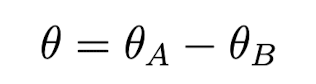

We will:
1. Run the script to estimate \( \hat{\theta} \) and compute the confidence interval for the difference.
2. Analyze the result:
   - If \( \hat{\theta} < 0 \), it suggests that MA may be better than MB.
   - Check if the confidence interval contains 0 and interpret the p-value to see if the result is statistically significant.
3. Compare the result with the conclusions from **Exercise 7.1.2**.

The McNemar test will help us understand whether the observed difference between MA and MB is due to chance or if there is statistical evidence supporting one model over the other.

In [ ]:
from dtuimldmtools import mcnemar

# Compute the Jeffreys interval
alpha = 0.05
[thetahat, CI, p] = mcnemar(y_true, yhat[:, 0], yhat[:, 1], alpha=alpha)

print("")
print("theta = theta_A-theta_B point estimate", thetahat, " CI: ", CI, "p-value", p)


### McNemar Test Results Interpretation

- **\( \hat{\theta} \)**: The point estimate of the difference in performance between the two models. If \( \hat{\theta} < 0 \), it suggests that model **MA** may be better than **MB**.
- **Confidence Interval (CI)**: The range within which the true difference in performance lies. If the interval contains 0, the result is not statistically significant, meaning the models likely have similar performance.
- **p-value**: The probability that the observed difference in performance is due to chance. A high p-value suggests the difference is not statistically significant.

### Interpretation of McNemar Test Results

- **Comparison Matrix (n)**:
  - Both models correctly classified 143 instances.
  - Model **MA** was correct for 1 instance where **MB** was wrong.
  - Model **MB** was correct for 4 instances where **MA** was wrong.
  
- **Confidence Interval (CI)**: The interval is \( (-0.0489, 0.00895) \), meaning the true difference in performance could be very small, and it barely excludes 0, providing weak evidence of any difference.
- **p-value**: \( p = 0.375 \), meaning the difference between the models is likely due to chance, and we cannot conclude that either model is significantly better.
- **Point Estimate**: \( \hat{\theta} = -0.02 \), suggesting model **MA** performs slightly better, but the difference is very small and not significant.
  
Overall, the test results are **inconclusive**, and no definitive conclusion can be made about whether **MA** or **MB** is better.

### Exercise 7.1.5: Comparing MA against MC using McNemar’s Test

In this exercise, we modify the previous script to compare model **MA** against model **MC** using McNemar’s test. The objective is to determine whether there are statistically significant differences between the performance of these two models.

We will:
1. Use McNemar’s test to estimate the difference in performance between **MA** and **MC**.
2. Evaluate whether the confidence interval and p-value indicate a significant difference between the models.
3. Compare the results and analyze whether there is strong statistical evidence to suggest that **MA** performs better than **MC**.

### Key Points:
- **Confidence Interval**: We expect to find a wider confidence interval if there is a more significant difference in performance.
- **p-value**: A low p-value (e.g., \( p < 0.01 \)) would suggest that the difference in performance between **MA** and **MC** is statistically significant and unlikely to be due to chance.
- **Conclusion**: The performance difference \( \theta \) is expected to be in the range of **0.05 to 0.1**, with strong evidence suggesting **MA** is better than **MC**.

In [ ]:
from dtuimldmtools import mcnemar

# Compute the Jeffreys interval for models MA and MC
alpha = 0.05
[thetahat, CI, p] = mcnemar(y_true, yhat[:, 0], yhat[:, 2], alpha=alpha)

print("")
print("theta = theta_A - theta_C point estimate", thetahat, " CI: ", CI, "p-value", p)

### Interpretation of McNemar Test Results (MA vs MC)

- **Comparison Matrix (n)**: 
  - Both models correctly classified 129 instances.
  - **MA** was correct for 15 instances where **MC** was incorrect.
  - **MC** was correct for 3 instances where **MA** was incorrect.
  
- **Confidence Interval (CI)**: The confidence interval \( (0.0261, 0.1336) \) shows that the true difference in performance is between **2.6% and 13.4%**, indicating that **MA** performs better than **MC**.

- **p-value**: \( p = 0.0075 \), which is less than 0.05, indicating the difference in performance is statistically significant. We can reject the null hypothesis that the two models have the same accuracy.

- **Point Estimate**: \( \hat{\theta} = 0.08 \), indicating that **MA** performs **8% better** than **MC**.
  
**Conclusion**: There is strong evidence that **MA** performs better than **MC**, with a statistically significant difference in accuracy.

### Exercise 7.1.6: Comparing KNN with k=1 Against a Decision Tree

In this task, we will:
1. Modify the script from **Exercise 7.1.1** to replace **model MB** with a **classification tree** model.
2. Use **McNemar’s test** to compare the performance of the **classification tree** against a **KNN classifier with \( k = 1 \)**.
3. Analyze the results to determine whether the decision tree or the KNN model performs better based on the test.

The goal is to determine if there is a statistically significant difference in the performance of the two models, and to evaluate whether one model is clearly superior.

### Exercise 7.2: Statistical Evaluation of a Regression Model

In this exercise, we will statistically evaluate and compare two regression models: 
1. A **linear regression model**
2. A **regression tree model**

The dataset used is the **wine dataset**, where the goal is to predict the **alcohol content** based on other features. The exercise is divided into several parts:

1. **Exercise 7.2.1**: 
   - The script ex7_2_1.py uses the **hold-out method** to generate a training/test split. 
   - It applies a **t-test** to obtain a confidence interval for the linear regression model.
   - We will modify the script to obtain a confidence interval for the regression tree.

In [64]:
# exercise 5.1.5
import os

import importlib_resources
import numpy as np
from scipy.io import loadmat

def load_5_1_5():
    filename = importlib_resources.files("dtuimldmtools").joinpath("data/wine.mat")
    # Load Matlab data file and extract variables of interest
    workingDir = os.getcwd()
    print("Running from: " + workingDir)

    mat_data = loadmat(filename)
    X = mat_data["X"]
    y = mat_data["y"].astype(int).squeeze()
    C = mat_data["C"][0, 0]
    M = mat_data["M"][0, 0]
    N = mat_data["N"][0, 0]

    attributeNames = [i[0][0] for i in mat_data["attributeNames"]]
    classNames = [j[0] for i in mat_data["classNames"] for j in i]


    # Remove outliers
    outlier_mask = (X[:, 1] > 20) | (X[:, 7] > 10) | (X[:, 10] > 200)
    valid_mask = np.logical_not(outlier_mask)
    X = X[valid_mask, :]
    y = y[valid_mask]
    # Remove attribute 12 (Quality score)
    X = X[:, 0:11]
    attributeNames = attributeNames[0:11]
    # Update N and M
    N, M = X.shape

    print("Ran Exercise 5.1.5")

    return X, y, N, M

In [59]:
import numpy as np
import scipy.stats
import scipy.stats as st
import sklearn.tree

from matplotlib.pyplot import figure, plot, show, xlabel, ylabel
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X, y, N, M = load_5_1_5()

X, y = X[:, :10], X[:, 10:]
# This script crates predictions from three KNN classifiers using cross-validation

test_proportion = 0.2

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=test_proportion
)

mA = sklearn.linear_model.LinearRegression().fit(X_train, y_train)
mB = sklearn.tree.DecisionTreeRegressor().fit(X_train, y_train)

yhatA = mA.predict(X_test)
yhatB = mB.predict(X_test)[:, np.newaxis]  #  justsklearnthings

# perform statistical comparison of the models
# compute z with squared error.
zA = np.abs(y_test - yhatA) ** 2

# compute confidence interval of model A
alpha = 0.05
CIA = st.t.interval(
    1 - alpha, df=len(zA) - 1, loc=np.mean(zA), scale=st.sem(zA)
)  # Confidence interval

# Compute confidence interval of z = zA-zB and p-value of Null hypothesis
zB = np.abs(y_test - yhatB) ** 2
z = zA - zB
CI = st.t.interval(
    1 - alpha, len(z) - 1, loc=np.mean(z), scale=st.sem(z)
)  # Confidence interval
p = 2 * st.t.cdf(-np.abs(np.mean(z)) / st.sem(z), df=len(z) - 1)  # p-value

In [ ]:
# Compute the confidence interval for the regression tree model (mB)
CIB = st.t.interval(1 - alpha, df=len(zB) - 1, loc=np.mean(zB), scale=st.sem(zB))

# Output the results for the regression tree model
print(f"Regression Tree Confidence Interval: {CIB}")

### Exercise 7.2.2: Comparing Linear Regression and Regression Tree Models

In this exercise, we will compare the performance of a **Linear Regression model** and a **Regression Tree model** using the squared errors as the performance metric. The goal is to:

1. Calculate the **difference in squared errors** between the two models.
2. Compute the **confidence interval** for this difference to determine if there is a statistically significant performance gap.
3. Calculate the **p-value** to test the null hypothesis that both models perform equally well (i.e., the difference in performance is not statistically significant).

Based on the confidence interval and p-value, we will draw conclusions about whether one model significantly outperforms the other.

In [ ]:
# Compute the difference in squared errors (Linear Regression - Decision Tree)
z = zA - zB

# Compute the confidence interval for the difference in errors
CI_diff = st.t.interval(1 - alpha, df=len(z) - 1, loc=np.mean(z), scale=st.sem(z))

# Compute the p-value for the difference between the models
p_value = 2 * st.t.cdf(-np.abs(np.mean(z)) / st.sem(z), df=len(z) - 1)

# Output the results
print(f"Confidence Interval for the difference in errors (Linear Regression - Decision Tree): {CI_diff}")
print(f"p-value for the difference: {p_value}")

### Interpretation of Results:

- **Confidence Interval**: The confidence interval for the difference in errors between the Linear Regression and Regression Tree models is \( (-0.1659, -0.0591) \), which excludes 0. This indicates a statistically significant difference, with the Linear Regression model having lower squared errors than the Regression Tree model.
  
- **p-value**: The p-value is extremely small \( (3.78 \times 10^{-5}) \), confirming that the difference in performance is statistically significant and not due to random chance.

**Conclusion**: The Linear Regression model significantly outperforms the Regression Tree model in this case.

### Exercise 7.2.3: Comparing Hold-Out and K-Fold Cross-Validation

In this exercise, we will modify the script to use **K = 10-fold cross-validation** and compare the results (p-value and confidence interval) to those obtained using the hold-out method.

Steps:
1. Implement 10-fold cross-validation for both the **Linear Regression model** and the **Regression Tree model**.
2. Compare the **p-value** and **confidence interval** between the hold-out method and cross-validation.
3. Analyze the expected changes in the confidence interval as we transition from the hold-out method to K-fold cross-validation, and eventually to leave-one-out cross-validation (LOO-CV).
4. Re-run the experiment using the **L1 loss** as the performance measure instead of the squared error (L2 loss).

The objective is to determine how different evaluation methods affect the model performance comparison.

In [ ]:
import numpy as np
import scipy.stats as st
import sklearn.tree
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y, N, M = load_5_1_5()

# Assuming X and y are already loaded
X, y = X[:, :10], X[:, 10:]

# Define the number of folds for cross-validation
K = 10
alpha = 0.05

# Initialize arrays to store errors across folds
errors_A = []
errors_B = []

# Perform 10-fold cross-validation
CV = model_selection.KFold(n_splits=K, shuffle=True, random_state=42)

for train_index, test_index in CV.split(X):
    X_train, X_test = X[train_index, :], X[test_index, :]
    y_train, y_test = y[train_index], y[test_index]

    # Fit Linear Regression model
    mA = LinearRegression().fit(X_train, y_train)

    # Fit Decision Tree model
    mB = DecisionTreeRegressor().fit(X_train, y_train)

    # Get predictions for both models
    yhatA = mA.predict(X_test)
    yhatB = mB.predict(X_test)

    # Compute L1 loss (absolute error) for both models
    zA = np.abs(y_test - yhatA)  # L1 loss for Linear Regression
    zB = np.abs(y_test - yhatB)  # L1 loss for Decision Tree

    errors_A.append(np.mean(zA))
    errors_B.append(np.mean(zB))

# Convert errors to numpy arrays
errors_A = np.array(errors_A)
errors_B = np.array(errors_B)

# Compute the difference in L1 errors between the two models
z = errors_A - errors_B

# Compute the confidence interval for the difference in errors
CI_diff = st.t.interval(1 - alpha, df=len(z) - 1, loc=np.mean(z), scale=st.sem(z))

# Compute the p-value for the difference between the models
p_value = 2 * st.t.cdf(-np.abs(np.mean(z)) / st.sem(z), df=len(z) - 1)

# Output the results
print(f"Confidence Interval for the difference in L1 errors (Linear Regression - Decision Tree): {CI_diff}")
print(f"p-value for the difference: {p_value}")

### Interpretation of 10-Fold Cross-Validation Results:

- **Confidence Interval**: The confidence interval for the difference in L1 errors between Linear Regression and Decision Tree is \( (-0.9789, -0.9320) \). Since the interval is entirely negative, it indicates that the Linear Regression model consistently has lower errors than the Decision Tree model.
  
- **p-value**: The p-value is extremely small \( (1.05 \times 10^{-14}) \), confirming that the difference in performance is statistically significant and not due to random chance.

**Conclusion**: Linear Regression significantly outperforms the Decision Tree model based on L1 loss.

### 7.3 Statistical evaluation in setup II (Optional)

### 7.4 Bayes and Naive Bayes

### Exercise 7.4: Bayes and Naive Bayes Classification

In this exercise, we classify names as either male or female using:
1. **Bayes classifier**: Using all letter features simultaneously.
2. **Naive Bayes classifier**: Assuming each letter feature is conditionally independent of the others given the class label.

#### Key Steps:
1. **Feature Extraction**:
   - Extract the **first**, **second**, **second-to-last**, and **last letter** of each name as features.
   - Encode these letter features as numerical values (1 for 'a', 26 for 'z') for the classifier.

2. **Tasks**:
   - **Exercise 7.4.1**: Count occurrences of letter combinations to estimate probabilities.
   - **Exercise 7.4.2**: Evaluate the adequacy of estimating probabilities based on training data and consider the use of a Naive Bayes classifier.
   - **Exercise 7.4.3**: Run the provided script to load and process the data, filtering names and extracting features.
   - **Exercise 7.4.4**: Implement a Naive Bayes classifier with a uniform prior (equal probabilities for male and female) and compute the classification error using 10-fold cross-validation.
   - **Exercise 7.4.5**: Modify the prior to reflect empirical probabilities of male and female names in the training data and evaluate any improvement.

The objective is to see how well the Naive Bayes assumption performs in comparison to the full Bayes classifier.

### Exercise 7.4.1: Counting Letter Combinations

To classify names as male or female based on four specific letter positions:
- **\( x_1 \):** First letter
- **\( x_2 \):** Second letter
- **\( x_3 \):** Second-to-last letter
- **\( x_4 \):** Last letter

we need to evaluate all possible letter combinations across these positions. 

#### Calculation:
Each letter position can take on **26 possible values** (from 'a' to 'z'). Since there are **four positions** to evaluate, the total number of combinations is calculated as:

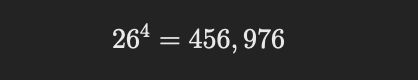

Thus, there are **456,976 different letter combinations** to consider. For each combination, we would count its occurrences in the male and female names within the training data to estimate probabilities for classification.

### Exercise 7.4.2: Estimating Instances Required for Reliable Probability Estimates

To classify names by gender using all possible four-letter combinations, we need reliable probability estimates for each combination:
- There are **456,976 possible combinations** (26 letters across four positions).

#### Data Requirement
A common rule of thumb is to have at least **10 occurrences per combination** to stabilize probability estimates. Therefore, the required number of instances would be:

\[
456,976 \times 10 = 4,569,760
\]

Thus, we would need approximately **4.57 million instances** to obtain reliable estimates for each combination. Given that this is often impractical, the **Naïve Bayes assumption** of independence between letter positions is typically used to simplify the estimation process.

### Exercise 7.4.3: Feature Extraction for Name Classification

In this exercise, we will prepare the dataset for classifying names as male or female by:
1. **Loading the dataset** with labeled male and female names.
2. **Filtering**: Only names with at least four letters will be included in the analysis.
3. **Feature Extraction**: For each name, we will extract:
   - The **first** letter,
   - The **second** letter,
   - The **second-to-last** letter, and
   - The **last** letter.

These extracted letter features will serve as inputs to a Naïve Bayes classifier, which will learn patterns based on these specific letter positions.

In [ ]:
# exercise 7.4.3
import importlib_resources
import numpy as np

# Load list of names from files

fmale = open(importlib_resources.files("dtuimldmtools").joinpath("data/male.txt"), "r")
ffemale = open(
    importlib_resources.files("dtuimldmtools").joinpath("data/female.txt"), "r"
)
mnames = fmale.readlines()
fnames = ffemale.readlines()
names = mnames + fnames
gender = [0] * len(mnames) + [1] * len(fnames)
fmale.close()
ffemale.close()

# Extract X, y and the rest of variables. Include only names of >4 characters.
X = np.zeros((len(names), 4))
y = np.zeros((len(names), 1))
n = 0
for i in range(0, len(names)):
    name = names[i].strip().lower()
    if len(name) > 3:
        X[n, :] = [
            ord(name[0]) - ord("a") + 1,
            ord(name[1]) - ord("a") + 1,
            ord(name[-2]) - ord("a") + 1,
            ord(name[-1]) - ord("a") + 1,
        ]
        y[n, 0] = gender[i]
        n += 1
X = X[0:n, :]
y = y[0:n, :]

N, M = X.shape
C = 2
attributeNames = ["1st letter", "2nd letter", "Next-to-last letter", "Last letter"]
classNames = ["Female", "Male"]

print("Ran Exercise 7.2.3")

In [ ]:
X.shape

### Exercise 7.4.4: Naïve Bayes Classification with Cross-Validation

In this exercise, we will:
1. **Implement a Naïve Bayes classifier** to classify names as male or female, assuming independence between the letter features.
2. **Set Prior Probabilities**: Use a uniform prior, assuming equal likelihood of male and female names.
3. **Evaluate the Model**: Perform **10-fold cross-validation** to calculate the classification error and assess the model's performance.

This approach will help determine the effectiveness of the Naïve Bayes assumption in classifying names by gender

In [ ]:
# exercise 7.4.4
import numpy as np
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder

np.random.seed(2450)
y = y.squeeze()
0
# Naive Bayes classifier parameters
alpha = 1.0  # pseudo-count, additive parameter (Laplace correction if 1.0 or Lidtstone smoothing otherwise)
fit_prior = True  # uniform prior (change to True to estimate prior from data)

# K-fold crossvalidation
K = 10
CV = model_selection.KFold(n_splits=K, shuffle=True)

X = X[:, 0:4]  # using all 4 letters,
#X = X[:, 0:2]  # using only 2 letters,
# for using e.g. only third letter or first and last try X[:,[2]] and X[:, [0,3]]

# We need to specify that the data is categorical.
# MultinomialNB does not have this functionality, but we can achieve similar
# results by doing a one-hot-encoding - the intermediate steps in in training
# the classifier are off, but the final result is corrent.
# If we didn't do the converstion MultinomialNB assumes that the numbers are
# e.g. discrete counts of tokens. Without the encoding, the value 26 wouldn't
# mean "the token 'z'", but it would mean 26 counts of some token,
# resulting in 1 and 2 meaning a difference in one count of a given token as
# opposed to the desired 'a' versus 'b'.
X = OneHotEncoder().fit_transform(X=X)

errors = np.zeros(K)
k = 0
for train_index, test_index in CV.split(X):
    # print('Crossvalidation fold: {0}/{1}'.format(k+1,K))

    # extract training and test set for current CV fold
    X_train = X[train_index, :]
    y_train = y[train_index]
    X_test = X[test_index, :]
    y_test = y[test_index]

    nb_classifier = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
    nb_classifier.fit(X_train, y_train)
    y_est_prob = nb_classifier.predict_proba(X_test)
    y_est = np.argmax(y_est_prob, 1)

    errors[k] = np.sum(y_est != y_test, dtype=float) / y_test.shape[0]
    k += 1

# Plot the classification error rate
print("Error rate: {0}%".format(100 * np.mean(errors)))

print("Ran Exercise 7.2.4")

1. **Naïve Bayes Classifier Setup**:
   - The **MultinomialNB** classifier is used, with `alpha = 1.0` for Laplace smoothing.
   - A **uniform prior** (equal probability for male and female) is used for simplicity.
   
2. **Encoding Categorical Data**:
   - **One-hot encoding** is applied to treat each letter as a unique categorical token. This ensures that the Naïve Bayes classifier interprets letters correctly rather than as numeric counts.

3. **10-Fold Cross-Validation**:
   - **10-fold cross-validation** is used to evaluate the classifier. For each fold:
     - **Training and Testing**: The model is trained on the training set and evaluated on the test set.
     - **Error Calculation**: The classification error is computed for each fold.
   
4. **Output**:
   - The overall error rate, averaged across all folds, is displayed as a measure of the classifier’s performance.

### Exercise 7.4.5: Adjusting Priors for Naïve Bayes Classification

In this exercise, we modify the Naïve Bayes classifier to use empirical priors rather than a uniform prior:
1. **Calculate Empirical Priors**:
   - Compute the prior probability for each class (male, female) based on their proportions in the training data.
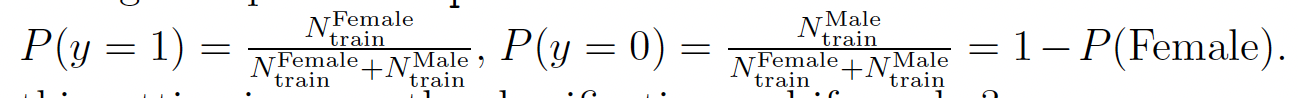

2. **Update Naïve Bayes Classifier**:
   - Use the empirical priors in the classifier, rather than assuming equal probabilities for both classes.

3. **Evaluation**:
   - Run the classifier with the new priors and evaluate whether the classification accuracy improves.
   - Analyze the results and consider how the dataset’s gender composition may influence performance with empirical priors.

This will help us understand the impact of using data-driven priors in the Naïve Bayes model.

In [ ]:
import numpy as np
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder

np.random.seed(2450)
y = y.squeeze()  # Ensure y is a 1-dimensional array

# Naive Bayes classifier parameters
alpha = 1.0  # Laplace smoothing parameter
fit_prior = False  # Disable built-in prior estimation

# K-fold cross-validation
K = 10
CV = model_selection.KFold(n_splits=K, shuffle=True)

# One-hot encode the features to ensure correct categorical representation
X_encoded = OneHotEncoder().fit_transform(X)

# Initialize array to store error rates
errors = np.zeros(K)
k = 0

# Cross-validation loop
for train_index, test_index in CV.split(X_encoded):
    # Split data for current fold
    X_train = X_encoded[train_index, :]
    y_train = y[train_index]
    X_test = X_encoded[test_index, :]
    y_test = y[test_index]

    # Calculate empirical priors from the training set
    female_prior = np.sum(y_train == 0) / len(y_train)  # P(Female)
    male_prior = 1 - female_prior  # P(Male)
    class_prior = [female_prior, male_prior]

    # Create and train Naive Bayes classifier with empirical priors
    nb_classifier = MultinomialNB(alpha=alpha, fit_prior=fit_prior, class_prior=class_prior)
    nb_classifier.fit(X_train, y_train)

    # Predict on the test set and calculate error
    y_est = nb_classifier.predict(X_test)
    errors[k] = np.mean(y_est != y_test)
    k += 1

# Output the average classification error across all folds
print("Error rate with empirical priors: {:.2f}%".format(100 * np.mean(errors)))

-> no improvement